# Support Vector Classification 

## The Pima Indian diabetes

We want to predict whether a vector of text features corresponds to a patient having diabetes

### Attribute Information:

Patterns have 8 numeric features plus a 0-1 class label.

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 


More details and actual data available in https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import time
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3)

## Loading Data

In [3]:
f_name = 'D:\googledrive\cursos\datasets\pima.csv'
df_pima = pd.read_csv(f_name, sep=';')

print( "num_rows: %d\tnum_columns: %d\n" % (df_pima.shape[0], df_pima.shape[1]) )
print( "Column names:\n", list(df_pima.columns) )

vars_pima   = list(df_pima.columns[ : -1])
target_pima = df_pima.columns[-1]

num_rows: 768	num_columns: 9

Column names:
 ['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age', 'label']


## Data Exploration, Visualization and Correlations

Descriptive statistics, boxplots and histograms

In [4]:
########## basic feature stats

df_pima.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Removing patients with 0 blood pressure.

In [5]:
idx_blood_press_ok = df_pima['bloodPress'].values > 0.
#idx_insulin_ok = df_pima['insulin'].values > 0.
idx_glucose_ok = df_pima['glucose'].values > 0.
idx_massIndex_ok = df_pima['massIndex'].values > 0.
idx_skin_ok = df_pima['skinThick'].values > 0.

#idx_ok_all = np.logical_and(idx_blood_press_ok, idx_insulin_ok)
idx_ok_all = idx_blood_press_ok
print(idx_ok_all.sum())

#for idx in [idx_glucose_ok, idx_massIndex_ok, idx_skin_ok]:
for idx in [idx_glucose_ok, idx_massIndex_ok]:
    idx_ok_all = np.logical_and(idx_ok_all, idx)
    print(idx_ok_all.sum())

733
728
724


In [6]:
df_pima = df_pima.loc[ idx_ok_all ]
df_pima.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## SV Classifier

Build a first model to be hyperparameterized later.

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

x = df_pima[ vars_pima ].values
y = df_pima[ target_pima ].values

# scale data
mm_sc = MinMaxScaler()
x = mm_sc.fit_transform(x)

num_patterns, dim = x.shape
C = 1.
svc_m = SVC(C=C, gamma=1/dim, kernel='rbf', shrinking=False, tol=1.e-3)

t_0 = time.time()
svc_m.fit(x, y)
print("train_time:", time.time() - t_0)

train_time: 0.026017427444458008


Explore model properties

In [8]:
print("num_svs_per_class:", svc_m.n_support_)
print("indices_of_svs:   ", svc_m.support_)
print("svs:              ", svc_m.support_vectors_)

print("dual_coefs:       ", svc_m.dual_coef_)
print("intercep:         ", svc_m.intercept_)
print("num SVs at bound: ", (abs(svc_m.dual_coef_) == C).sum())
print("num SVs:          ", (np.logical_and(abs(svc_m.dual_coef_) < C, 
                                            abs(svc_m.dual_coef_) > 0.).sum()))

num_svs_per_class: [223 223]
indices_of_svs:    [  8  10  15  17  18  25  26  27  31  33  37  38  41  43  50  53  54  58
  62  64  66  68  77  78  83  84  86  87  93  97  99 113 115 118 125 127
 130 131 132 133 136 138 139 141 144 151 152 153 157 158 159 168 171 173
 180 188 189 192 199 200 205 210 215 216 220 231 233 234 235 237 238 243
 245 247 249 251 252 258 259 262 265 266 269 270 273 278 279 281 283 287
 288 294 296 301 303 308 310 312 313 315 317 321 323 324 325 326 329 335
 338 339 341 342 350 355 365 368 371 377 381 386 387 388 389 396 403 407
 409 410 412 415 428 431 432 436 440 441 442 443 444 446 448 449 450 452
 456 457 459 464 468 471 475 477 485 487 489 491 497 498 503 512 513 514
 517 520 522 523 533 539 540 541 543 547 548 555 558 567 570 575 578 581
 583 588 589 602 605 611 612 617 618 620 628 629 630 633 634 644 647 649
 651 656 657 658 663 666 667 669 673 677 679 680 681 682 683 684 692 700
 701 703 707 712 719 720 721   0   2   4   6   7   9  11  12  13  14  16
  2

## Hyperparametrization of C and $\gamma$

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

l_C     = [10.**k for k in range(-5,5)] 
l_gamma = list( np.array([2.**k for k in range(-6,6)]) / dim)

parameters = {'C': l_C, 'gamma': l_gamma}
print("num_hyperparams", len(l_C) * len(l_gamma))

n_folds = 10

svc_m = SVC(kernel='rbf', shrinking=False, tol=1.e-3)

C_gamma_search = GridSearchCV(svc_m, param_grid=parameters, 
                              cv=StratifiedKFold(n_folds, shuffle=True), 
                              scoring='accuracy', n_jobs=2,
                              return_train_score=True)

t_0 = time.time()
C_gamma_search.fit(x, y)
print("grid_search_time:", time.time() - t_0)

num_hyperparams 120
grid_search_time: 133.20646929740906


In [10]:
f_pkl = open("c_gamma_cv_search_pima.plk", 'wb') 
pickle.dump(C_gamma_search, f_pkl)
f_pkl.close()

### Analyze hyperpars

In [11]:
f_pkl = open("c_gamma_cv_search_pima.plk", 'rb') 
C_gamma_search = pickle.load(f_pkl)
f_pkl.close()

best_C: 100.0 	best_gamma: 0.001953125


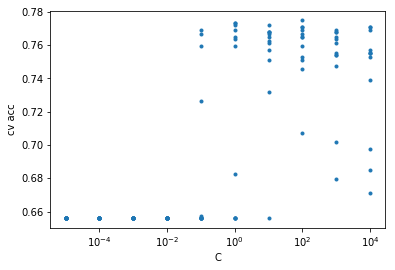

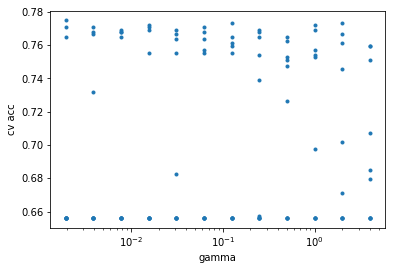

In [12]:
print("best_C:", C_gamma_search.best_params_['C'], "\tbest_gamma:", C_gamma_search.best_params_['gamma'])

df_C_gamma_search = pd.DataFrame.from_dict(C_gamma_search.cv_results_)

plt.xlabel('C')
plt.ylabel('cv acc')
plt.xscale('log')
#plt.ylim(0.786, 0.788)
_ = plt.plot( df_C_gamma_search['param_C'], df_C_gamma_search['mean_test_score'], '.')
plt.show()

plt.xlabel('gamma')
plt.ylabel('cv acc')
plt.xscale('log')
#plt.ylim(0.786, 0.788)
_ = plt.plot( df_C_gamma_search['param_gamma'], df_C_gamma_search['mean_test_score'], '.')
plt.show()

## Analyzing best hyperpars

Sort by best CV test score

In [13]:
df_C_gamma_search.sort_values(by='mean_test_score', ascending=False)[['param_C', 'param_gamma', 'mean_test_score']][ : 10]

,param_C,param_gamma,mean_test_score
84,100,0.00195312,0.774862
66,1,0.125,0.773481
70,1,2,0.773481
69,1,1,0.772099
75,10,0.015625,0.772099
109,10000,0.00390625,0.770718
87,100,0.015625,0.770718
108,10000,0.00195312,0.770718
89,100,0.0625,0.770718
88,100,0.03125,0.769337


### C vs $\gamma$ plot

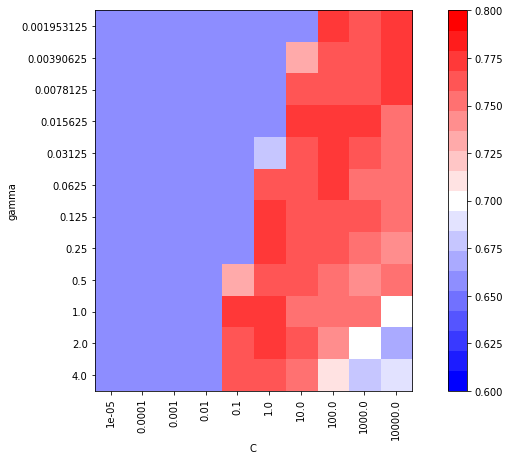

In [14]:
m_t_s = df_C_gamma_search.sort_values(by=['param_gamma', 'param_C'])['mean_test_score'].values.reshape(len(l_gamma), -1)

nticks_C = len(l_C)
nticks_gamma = len(l_gamma)

plt.figure( figsize=(13, 7) )

plt.xlabel('C')
plt.ylabel('gamma')

plt.xticks(range(nticks_C), l_C, rotation='vertical')
plt.yticks(range(nticks_gamma), l_gamma)

cMap = plt.cm.get_cmap("bwr",lut=19) 

#_ = plt.colorbar(plt.imshow(m_t_s, interpolation='nearest', cmap=cMap))
_ = plt.colorbar(plt.imshow(m_t_s, interpolation='nearest', vmin=0.6, vmax=0.8, cmap=cMap))

plt.show()

### Structure of best model

In [15]:
best_C = C_gamma_search.best_params_['C']
best_gamma = C_gamma_search.best_params_['gamma']

svc_m = SVC(C=best_C, gamma=best_gamma, kernel='rbf', shrinking=False, tol=1.e-6)

t_0 = time.time()
svc_m.fit(x, y)
print(time.time() - t_0)

print("num_svs_per_class:", svc_m.n_support_)
print("dual_coefs:       ", svc_m.dual_coef_)
print("intercep:         ", svc_m.intercept_)

0.018512964248657227
num_svs_per_class: [214 214]
dual_coefs:        [[-100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.     -73.212 -100.    -100.    -100.     -82.282 -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100.    -100.     -81.898 -100.    -100.    -100.    -100.    -100.
   -76.222 -100.    -100.    -100.    -100.    -100.    -100.    -100.
  -100. 

### Accuracy, recall and precision of best model

In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

sssf = StratifiedShuffleSplit(n_splits=10, test_size=0.25)

cv_acc_best = cross_val_score(svc_m, x, y, cv=sssf, scoring='accuracy')
print("\ncv mean accuracy: %.3f" % (cv_acc_best.mean()))

cv_recall_best = cross_val_score(svc_m, x, y, cv=sssf, scoring='recall')
print("\ncv mean recall: %.3f" % (cv_recall_best.mean()))

cv_precision_best = cross_val_score(svc_m, x, y, cv=sssf, scoring='precision')
print("\ncv mean precision: %.3f" % (cv_precision_best.mean()))


cv mean accuracy: 0.765

cv mean recall: 0.531

cv mean precision: 0.749


In [17]:
y_pred = cross_val_predict(svc_m, x, y, cv=StratifiedKFold(n_folds))

print("accuracy:  %.3f" % accuracy_score(y, y_pred))
print("recall:    %.3f" % recall_score(y, y_pred))
print("precision: %.3f" % precision_score(y, y_pred))

accuracy:  0.773
recall:    0.518
precision: 0.746


## Predicting probabilities

In classification we should give class probability estimates rather than labels.

To do so, we can build the histogram of the posterior probabilities predicted for the positive class and decide on adequate thresholds.

In [18]:
######### plot prob histograms
svc_m = SVC(C=best_C, gamma=best_gamma, kernel='rbf', shrinking=False, tol=1.e-6, probability=True)
svc_m.fit(x, y)

y_pred = cross_val_predict(svc_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True))

p_pred = cross_val_predict(svc_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True),
                           method='predict_proba')

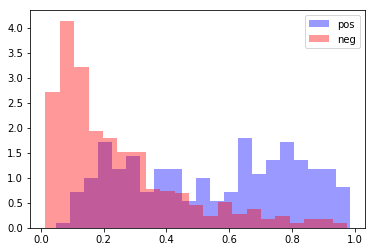

In [19]:
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

bins = 21

#plt.hist( p_pred[pos, 1], bins=bins, color='b', label='pos', alpha=0.5)
#plt.hist( p_pred[neg, 1], bins=bins, color='r', label='neg', alpha=0.5)

sns.distplot( p_pred[pos, 1], bins=bins, norm_hist=True, kde=False, color='b', label='pos')
sns.distplot( p_pred[neg, 1], bins=bins, norm_hist=True, kde=False, color='r', label='neg')
    
plt.legend(loc='best')
plt.show()

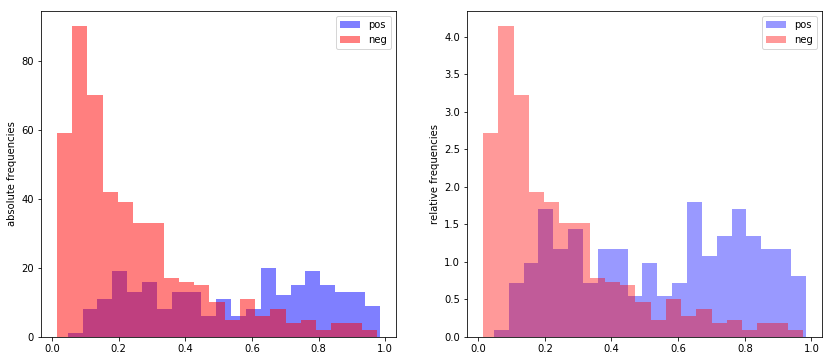

In [20]:
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

bins = 21

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.ylabel("absolute frequencies")
plt.hist( p_pred[pos, 1], bins=bins, normed=False, color='b', label='pos', alpha=0.5)
plt.hist( p_pred[neg, 1], bins=bins, normed=False, color='r', label='neg', alpha=0.5)
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.ylabel("relative frequencies")
sns.distplot( p_pred[pos, 1], bins=bins, norm_hist=True, kde=False, color='b', label='pos')
sns.distplot( p_pred[neg, 1], bins=bins, norm_hist=True, kde=False, color='r', label='neg')
plt.legend(loc='best')

plt.show()

### Applying classification models

Diabetes is a serious illness so we should try to improve recall as much as possible taking also into account our resources.

We explore the effect on the classification performance of lowering the decision threshold for positives below 0.5.

In [21]:
######### threshold analysis

l_thresholds = [0.5, 0.4, 0.3, 0.2]

for thresh in l_thresholds:
    y_pred_thresh = np.zeros( num_patterns ) 
    pos_thresh = np.where(p_pred[ :, 1] > thresh)[0]
    y_pred_thresh[pos_thresh] = 1

    print("threshold:", thresh)
    print("\tconfusion matrix\n", confusion_matrix(y, y_pred_thresh) )
    print("\n\taccuracy\t%.3f"   %   accuracy_score(y, y_pred_thresh) )
    print("\trecall\t\t%.3f"     %   recall_score(y, y_pred_thresh) )
    print("\tprecision\t%.3f"    %   precision_score(y, y_pred_thresh) )
    print("\tnum_alertas\t%d\n\n"    %   confusion_matrix(y, y_pred_thresh)[ : , 1 ].sum() )

threshold: 0.5
	confusion matrix
 [[422  53]
 [111 138]]

	accuracy	0.773
	recall		0.554
	precision	0.723
	num_alertas	191


threshold: 0.4
	confusion matrix
 [[390  85]
 [ 88 161]]

	accuracy	0.761
	recall		0.647
	precision	0.654
	num_alertas	246


threshold: 0.3
	confusion matrix
 [[344 131]
 [ 60 189]]

	accuracy	0.736
	recall		0.759
	precision	0.591
	num_alertas	320


threshold: 0.2
	confusion matrix
 [[264 211]
 [ 27 222]]

	accuracy	0.671
	recall		0.892
	precision	0.513
	num_alertas	433


